In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

2023-03-07 22:39:18.004308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 22:39:20.510801: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-03-07 22:39:20.510891: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-03-07 22:39:20.510899: W tensorflow/compiler/tf2tensorrt/utils/py_utils.c

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2023-03-07 22:39:23.587524: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 22:39:23.698761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 22:39:23.698817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def load_data(path, col=None, verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

data_path = "/mnt/d/Learning/tensorflow_learning/datasets/energy_2013_2019.csv"
multivar_df = load_data(data_path)

multivar_df

,Unnamed: 0,dt,dt_iso,city_id,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,2013-10-01 02:00:00,2013-10-01 00:00:00 +0000 UTC,2509954,Valencia,299.150000,299.150000,299.150000,1008,61,5,290,0.0,0.0,0.0,20,801,clouds,few clouds,02n
1,1,2013-10-01 03:00:00,2013-10-01 01:00:00 +0000 UTC,2509954,Valencia,298.150000,298.150000,298.150000,1009,65,4,250,0.0,0.0,0.0,20,801,clouds,few clouds,02n
2,2,2013-10-01 04:00:00,2013-10-01 02:00:00 +0000 UTC,2509954,Valencia,296.161000,296.161000,296.161000,1009,71,4,269,0.0,0.0,0.0,10,800,clear,sky is clear,02
3,3,2013-10-01 05:00:00,2013-10-01 03:00:00 +0000 UTC,2509954,Valencia,297.150000,297.150000,297.150000,1008,69,1,250,0.0,0.0,0.0,20,801,clouds,few clouds,02n
4,4,2013-10-01 06:00:00,2013-10-01 04:00:00 +0000 UTC,2509954,Valencia,294.031687,294.031687,294.031687,1009,78,4,288,0.0,0.0,0.0,0,800,clear,sky is clear,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262995,262995,2019-08-25 22:00:00,2019-08-25 20:00:00 +0000 UTC,6361046,Seville,300.490000,299.260000,302.150000,1012,47,3,250,0.0,0.0,0.0,0,800,clear,clear sky,01n
262996,262996,2019-08-25 23:00:00,2019-08-25 21:00:00 +0000 UTC,6361046,Seville,299.750000,298.150000,301.150000,1013,54,3,260,0.0,0.0,0.0,0,800,clear,clear sky,01n
262997,262997,2019-08-26 00:00:00,2019-08-25 22:00:00 +0000 UTC,6361046,Seville,298.830000,297.150000,300.150000,1013,60,2,310,0.0,0.0,0.0,0,800,clear,clear sky,01n
262998,262998,2019-08-26 01:00:00,2019-08-25 23:00:00 +0000 UTC,6361046,Seville,297.890000,296.480000,300.150000,1013,57,2,299,0.0,0.0,0.0,0,800,clear,clear sky,01n


In [4]:
multivar_df.city_id.value_counts()

3117735    53357
3128026    52774
6361046    52488
3128760    52416
2509954    51965
Name: city_id, dtype: int64

In [5]:
dataset = multivar_df[multivar_df['city_id']==3117735]
dataset.head()

,Unnamed: 0,dt,dt_iso,city_id,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
51965,51965,2013-10-01 02:00:00,2013-10-01 00:00:00 +0000 UTC,3117735,Madrid,291.860,291.860,291.860,1012,94,3,210,0.0,0.0,0.0,92,804,clouds,overcast clouds,04
51966,51966,2013-10-01 03:00:00,2013-10-01 01:00:00 +0000 UTC,3117735,Madrid,292.100,292.040,292.150,1012,93,4,180,0.0,0.0,0.0,92,300,drizzle,light intensity drizzle,09n
51967,51967,2013-10-01 04:00:00,2013-10-01 02:00:00 +0000 UTC,3117735,Madrid,291.761,291.761,291.761,1011,94,4,208,0.0,0.0,0.0,92,804,clouds,overcast clouds,04
51968,51968,2013-10-01 05:00:00,2013-10-01 03:00:00 +0000 UTC,3117735,Madrid,293.020,293.020,293.020,1012,93,4,193,0.0,0.0,0.0,80,803,clouds,broken clouds,04
51969,51969,2013-10-01 06:00:00,2013-10-01 04:00:00 +0000 UTC,3117735,Madrid,293.480,292.040,296.480,1012,93,4,200,0.0,0.0,0.0,75,803,clouds,broken clouds,04n


In [6]:
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.head()

,dt,dt_iso,city_id,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
51965,2013-10-01 02:00:00,2013-10-01 00:00:00 +0000 UTC,3117735,Madrid,291.860,291.860,291.860,1012,94,3,210,0.0,0.0,0.0,92,804,clouds,overcast clouds,04
51966,2013-10-01 03:00:00,2013-10-01 01:00:00 +0000 UTC,3117735,Madrid,292.100,292.040,292.150,1012,93,4,180,0.0,0.0,0.0,92,300,drizzle,light intensity drizzle,09n
51967,2013-10-01 04:00:00,2013-10-01 02:00:00 +0000 UTC,3117735,Madrid,291.761,291.761,291.761,1011,94,4,208,0.0,0.0,0.0,92,804,clouds,overcast clouds,04
51968,2013-10-01 05:00:00,2013-10-01 03:00:00 +0000 UTC,3117735,Madrid,293.020,293.020,293.020,1012,93,4,193,0.0,0.0,0.0,80,803,clouds,broken clouds,04
51969,2013-10-01 06:00:00,2013-10-01 04:00:00 +0000 UTC,3117735,Madrid,293.480,292.040,296.480,1012,93,4,200,0.0,0.0,0.0,75,803,clouds,broken clouds,04n


In [7]:
dataset = dataset.drop(["dt_iso", "weather_icon", "city_id", "city_name"], axis=1)
dataset.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description
51965,2013-10-01 02:00:00,291.860,291.860,291.860,1012,94,3,210,0.0,0.0,0.0,92,804,clouds,overcast clouds
51966,2013-10-01 03:00:00,292.100,292.040,292.150,1012,93,4,180,0.0,0.0,0.0,92,300,drizzle,light intensity drizzle
51967,2013-10-01 04:00:00,291.761,291.761,291.761,1011,94,4,208,0.0,0.0,0.0,92,804,clouds,overcast clouds
51968,2013-10-01 05:00:00,293.020,293.020,293.020,1012,93,4,193,0.0,0.0,0.0,80,803,clouds,broken clouds
51969,2013-10-01 06:00:00,293.480,292.040,296.480,1012,93,4,200,0.0,0.0,0.0,75,803,clouds,broken clouds


In [8]:
dataset = dataset.drop(["weather_main", "weather_description"], axis=1)
dataset.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
51965,2013-10-01 02:00:00,291.860,291.860,291.860,1012,94,3,210,0.0,0.0,0.0,92,804
51966,2013-10-01 03:00:00,292.100,292.040,292.150,1012,93,4,180,0.0,0.0,0.0,92,300
51967,2013-10-01 04:00:00,291.761,291.761,291.761,1011,94,4,208,0.0,0.0,0.0,92,804
51968,2013-10-01 05:00:00,293.020,293.020,293.020,1012,93,4,193,0.0,0.0,0.0,80,803
51969,2013-10-01 06:00:00,293.480,292.040,296.480,1012,93,4,200,0.0,0.0,0.0,75,803


In [9]:
dataset.isnull().sum()

dt            0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
weather_id    0
dtype: int64

In [10]:
col_names = list(dataset.columns)
col_names

['dt',
 'temp',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'clouds_all',
 'weather_id']

In [11]:
def clean_data(series):
    """Fills missing values. 
    
        Interpolate missing values with a linear approximation.
    """
    series_filled = series.interpolate(method='linear')
        
    return series_filled
        
    
def min_max_scale(dataframe):
    """ Applies MinMax Scaling
    
        Wrapper for sklearn's MinMaxScaler class.
    """
    mm = MinMaxScaler()
    return mm.fit_transform(dataframe)

In [12]:
def make_time_features(series):
    
    #convert series to datetimes
    datetimes = pd.DatetimeIndex(series)
    
    hours = datetimes.hour.values
    days = datetimes.day.values
    months = datetimes.month.values
    years = datetimes.year.values
    
    hour = pd.Series(hours, name='hours')
    day = pd.Series(days, name='day')
    month = pd.Series(months, name='months')
    year = pd.Series(years, name='year')
    
    return hour, day, month, year

In [13]:
def split_data(series, train_fraq):
    """Splits input series into train, val and test.
    
        Default to 1 year of test data.
    """
    #make train and validation from the remaining
    train_val_data = series
    train_size = int(len(train_val_data) * train_fraq)
    
    train_data = train_val_data[:train_size]
    val_data = train_val_data[train_size:]
    test_data = val_data
    
    return train_data, val_data, test_data

In [14]:
def window_dataset(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    """ Create a windowed tensorflow dataset
    
    """

    #create a window with n steps back plus the size of the prediction length
    window = n_steps + n_horizon
    
    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)
    
    #create the window function shifting the data by the prediction length
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)
    
    #flatten the dataset and batch into the window size
    ds = ds.flat_map(lambda x : x.batch(window))
    ds = ds.shuffle(shuffle_buffer)    
    
    #create the supervised learning problem x and y and batch
    if multi_var:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:, :1]))
    else:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:]))
    
    ds = ds.batch(batch_size).prefetch(1)
    
    return ds

In [15]:
def build_dataset(train_fraq=0.80, n_steps=24, n_horizon=1, batch_size=256, shuffle_buffer=500, expand_dims=False, multi_var=False):
    """If multi variate then first column is always the column from which the target is contstructed.
    """
    
    tf.random.set_seed(23)
    
    if multi_var:
        data = dataset
        hours, day, months, years = make_time_features(data.dt)
        data = pd.concat([data.drop(['dt'], axis=1), hours, day, months, years], axis=1)
    else:
        data = load_data(col=['total load actual'])
        
    data = clean_data(data)
    
    if multi_var:
        mm = MinMaxScaler()
        data = mm.fit_transform(data)
    
    train_data, val_data, test_data = split_data(data, train_fraq=train_fraq)
    
    train_ds = window_dataset(train_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    val_ds = window_dataset(val_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    test_ds = window_dataset(test_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    print(f"Prediction lookback (n_steps): {n_steps}")
    print(f"Prediction horizon (n_horizon): {n_horizon}")
    print(f"Batch Size: {batch_size}")
    print("Datasets:")
    print(train_ds.element_spec)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = build_dataset(multi_var=True)

2023-03-07 22:39:24.934833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 22:39:24.940420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 22:39:24.940488: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 22:39:24.940522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Prediction lookback (n_steps): 24
Prediction horizon (n_horizon): 1
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))


In [17]:
model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}

def get_callbacks(model_name):
  callbacks = []
  MC = tf.keras.callbacks.ModelCheckpoint(f'saved_models/{model_name}', monitor='val_loss', save_best_only='True', verbose=1)
  ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights='True')
  return [MC, ES]

def run_model(model_name, model_func, model_configs, epochs):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    train_ds, val_ds, test_ds = build_dataset(n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks = get_callbacks(model.name))

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [18]:
def get_params(multivar=False):
    lr = 3e-4
    n_steps=24
    n_horizon=1
    if multivar:
        n_features=16
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

def dnn_model(n_steps, n_horizon, n_features, lr):
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(n_steps, n_features)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='dnn')
    
    loss=tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model


dnn = dnn_model(*get_params(multivar=True))
dnn.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 128)               49280     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 65,921
Trainable params: 65,921
Non-trainable par

In [19]:
def cnn_model(n_steps, n_horizon, n_features, lr=3e-4):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="CNN")
    
    loss= tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

cnn = cnn_model(*get_params(multivar=True))
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dropout (Dropout)           (None, 192)               0       

In [20]:
def lstm_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(72, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm = lstm_model(*get_params(multivar=True))
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 72)            25632     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129    

In [21]:
def lstm_cnn_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.LSTM(72, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="lstm_cnn")
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_cnn = lstm_cnn_model(*get_params(multivar=True))
lstm_cnn.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 3, 72)             39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

In [22]:
def lstm_cnn_skip_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
   
    inputs = tf.keras.layers.Input(shape=(n_steps,n_features), name='main')
    
    conv1 = tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu')(inputs)
    max_pool_1 = tf.keras.layers.MaxPooling1D(2)(conv1)
    conv2 = tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu')(max_pool_1)
    max_pool_2 = tf.keras.layers.MaxPooling1D(2)(conv2)
    lstm_1 = tf.keras.layers.LSTM(72, activation='relu', return_sequences=True)(max_pool_2)
    lstm_2 = tf.keras.layers.LSTM(48, activation='relu', return_sequences=False)(lstm_1)
    flatten = tf.keras.layers.Flatten()(lstm_2)
    
    skip_flatten = tf.keras.layers.Flatten()(inputs)

    concat = tf.keras.layers.Concatenate(axis=-1)([flatten, skip_flatten])
    drop_1 = tf.keras.layers.Dropout(0.3)(concat)
    dense_1 = tf.keras.layers.Dense(128, activation='relu')(drop_1)
    drop_2 = tf.keras.layers.Dropout(0.3)(dense_1)
    output = tf.keras.layers.Dense(n_horizon)(drop_2)
    
    model = tf.keras.Model(inputs=inputs, outputs=output, name='lstm_skip')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_skip = lstm_cnn_skip_model(*get_params(multivar=True))
lstm_skip.summary()

Model: "lstm_skip"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main (InputLayer)              [(None, 24, 16)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 19, 64)       6208        ['main[0][0]']                   
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 9, 64)        0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 7, 64)        12352       ['max_pooling1d[0][0]']          
                                                                                          

In [23]:
tf.keras.utils.plot_model(lstm_skip, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
model_configs=dict()
run_model("dnn", dnn_model, model_configs, epochs=150)
run_model("cnn", cnn_model, model_configs, epochs=150)
run_model("lstm", lstm_model, model_configs, epochs=150)
run_model("lstm_cnn", lstm_cnn_model, model_configs, epochs=150)
run_model("lstm_skip", lstm_cnn_skip_model, model_configs, epochs=150)

Prediction lookback (n_steps): 24
Prediction horizon (n_horizon): 1
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150


2023-03-07 22:39:32.310798: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x221bc0f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-07 22:39:32.310843: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-03-07 22:39:32.365465: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-07 22:39:32.742160: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-07 22:39:32.866776: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    327/Unknown - 14s 33ms/step - loss: 0.0135 - mae: 0.1156
Epoch 1: val_loss improved from inf to 0.00198, saving model to saved_models/dnn
INFO:tensorflow:Assets written to: saved_models/dnn/assets


INFO:tensorflow:Assets written to: saved_models/dnn/assets


330/330 [==============================] - 17s 43ms/step - loss: 0.0134 - mae: 0.1152 - val_loss: 0.0020 - val_mae: 0.0610
Epoch 2/150
327/330 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0986
Epoch 2: val_loss improved from 0.00198 to 0.00000, saving model to saved_models/dnn
INFO:tensorflow:Assets written to: saved_models/dnn/assets


INFO:tensorflow:Assets written to: saved_models/dnn/assets


330/330 [==============================] - 14s 43ms/step - loss: 0.0085 - mae: 0.0982 - val_loss: 4.0785e-06 - val_mae: 0.0024
Epoch 3/150
327/330 [============================>.] - ETA: 0s - loss: 0.0100 - mae: 0.1022
Epoch 3: val_loss did not improve from 0.00000
330/330 [==============================] - 14s 41ms/step - loss: 0.0099 - mae: 0.1018 - val_loss: 5.4914e-06 - val_mae: 0.0033
Epoch 4/150
327/330 [============================>.] - ETA: 0s - loss: 0.0123 - mae: 0.1165
Epoch 4: val_loss did not improve from 0.00000
330/330 [==============================] - 14s 41ms/step - loss: 0.0123 - mae: 0.1160 - val_loss: 1.9381e-04 - val_mae: 0.0190
Epoch 5/150
327/330 [============================>.] - ETA: 0s - loss: 0.0112 - mae: 0.1107
Epoch 5: val_loss did not improve from 0.00000
330/330 [==============================] - 14s 41ms/step - loss: 0.0111 - mae: 0.1102 - val_loss: 1.4757e-04 - val_mae: 0.0171
Epoch 6/150
327/330 [============================>.] - ETA: 0s - loss: 0.01

Prediction lookback (n_steps): 24
Prediction horizon (n_horizon): 1
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150


2023-03-07 22:41:52.046543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-07 22:41:56.575910: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


    330/Unknown - 29s 37ms/step - loss: 0.0176 - mae: 0.1235
Epoch 1: val_loss improved from inf to 0.00027, saving model to saved_models/CNN


INFO:tensorflow:Assets written to: saved_models/CNN/assets


INFO:tensorflow:Assets written to: saved_models/CNN/assets


330/330 [==============================] - 33s 49ms/step - loss: 0.0176 - mae: 0.1235 - val_loss: 2.6946e-04 - val_mae: 0.0198
Epoch 2/150
327/330 [============================>.] - ETA: 0s - loss: 0.0140 - mae: 0.1243
Epoch 2: val_loss improved from 0.00027 to 0.00009, saving model to saved_models/CNN


INFO:tensorflow:Assets written to: saved_models/CNN/assets


INFO:tensorflow:Assets written to: saved_models/CNN/assets


330/330 [==============================] - 15s 45ms/step - loss: 0.0139 - mae: 0.1238 - val_loss: 9.1284e-05 - val_mae: 0.0112
Epoch 3/150
327/330 [============================>.] - ETA: 0s - loss: 0.0149 - mae: 0.1300
Epoch 3: val_loss did not improve from 0.00009
330/330 [==============================] - 14s 42ms/step - loss: 0.0148 - mae: 0.1295 - val_loss: 8.8315e-04 - val_mae: 0.0387
Epoch 4/150
327/330 [============================>.] - ETA: 0s - loss: 0.0089 - mae: 0.1012
Epoch 4: val_loss did not improve from 0.00009
330/330 [==============================] - 14s 43ms/step - loss: 0.0089 - mae: 0.1008 - val_loss: 6.6789e-04 - val_mae: 0.0338
Epoch 5/150
328/330 [============================>.] - ETA: 0s - loss: 0.0064 - mae: 0.0860
Epoch 5: val_loss did not improve from 0.00009
330/330 [==============================] - 15s 44ms/step - loss: 0.0064 - mae: 0.0859 - val_loss: 3.6870e-04 - val_mae: 0.0252
Epoch 6/150
329/330 [============================>.] - ETA: 0s - loss: 0.00

Epoch 1/150
    330/Unknown - 56s 162ms/step - loss: 0.0144 - mae: 0.1243
Epoch 1: val_loss improved from inf to 0.00000, saving model to saved_models/lstm
INFO:tensorflow:Assets written to: saved_models/lstm/assets


INFO:tensorflow:Assets written to: saved_models/lstm/assets


330/330 [==============================] - 61s 179ms/step - loss: 0.0144 - mae: 0.1243 - val_loss: 2.2970e-06 - val_mae: 0.0017
Epoch 2/150
330/330 [==============================] - ETA: 0s - loss: 0.0117 - mae: 0.1143
Epoch 2: val_loss did not improve from 0.00000
330/330 [==============================] - 58s 174ms/step - loss: 0.0117 - mae: 0.1143 - val_loss: 2.0309e-04 - val_mae: 0.0189
Epoch 3/150
330/330 [==============================] - ETA: 0s - loss: 0.0071 - mae: 0.0910
Epoch 3: val_loss did not improve from 0.00000
330/330 [==============================] - 57s 174ms/step - loss: 0.0071 - mae: 0.0910 - val_loss: 1.6226e-04 - val_mae: 0.0162
Epoch 4/150
330/330 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0771
Epoch 4: val_loss did not improve from 0.00000
330/330 [==============================] - 56s 170ms/step - loss: 0.0049 - mae: 0.0771 - val_loss: 2.2262e-04 - val_mae: 0.0198
Epoch 5/150
330/330 [==============================] - ETA: 0s - loss: 

Epoch 1/150
    330/Unknown - 15s 37ms/step - loss: 0.0173 - mae: 0.1350
Epoch 1: val_loss improved from inf to 0.00000, saving model to saved_models/lstm_cnn


INFO:tensorflow:Assets written to: saved_models/lstm_cnn/assets


INFO:tensorflow:Assets written to: saved_models/lstm_cnn/assets


330/330 [==============================] - 21s 55ms/step - loss: 0.0173 - mae: 0.1350 - val_loss: 2.5862e-06 - val_mae: 0.0023
Epoch 2/150
330/330 [==============================] - ETA: 0s - loss: 0.0173 - mae: 0.1385
Epoch 2: val_loss did not improve from 0.00000
330/330 [==============================] - 15s 45ms/step - loss: 0.0173 - mae: 0.1385 - val_loss: 4.7256e-06 - val_mae: 0.0031
Epoch 3/150
329/330 [============================>.] - ETA: 0s - loss: 0.0170 - mae: 0.1378
Epoch 3: val_loss did not improve from 0.00000
330/330 [==============================] - 15s 46ms/step - loss: 0.0170 - mae: 0.1378 - val_loss: 6.1329e-06 - val_mae: 0.0035
Epoch 4/150
330/330 [==============================] - ETA: 0s - loss: 0.0166 - mae: 0.1359
Epoch 4: val_loss did not improve from 0.00000
330/330 [==============================] - 15s 46ms/step - loss: 0.0166 - mae: 0.1359 - val_loss: 4.2717e-06 - val_mae: 0.0029
Epoch 5/150
329/330 [============================>.] - ETA: 0s - loss: 0.01

Epoch 1/150
    329/Unknown - 15s 37ms/step - loss: 0.0243 - mae: 0.1490
Epoch 1: val_loss improved from inf to 0.00090, saving model to saved_models/lstm_skip


INFO:tensorflow:Assets written to: saved_models/lstm_skip/assets


INFO:tensorflow:Assets written to: saved_models/lstm_skip/assets


330/330 [==============================] - 21s 54ms/step - loss: 0.0243 - mae: 0.1490 - val_loss: 8.9968e-04 - val_mae: 0.0389
Epoch 2/150
329/330 [============================>.] - ETA: 0s - loss: 0.0112 - mae: 0.1170
Epoch 2: val_loss improved from 0.00090 to 0.00007, saving model to saved_models/lstm_skip


INFO:tensorflow:Assets written to: saved_models/lstm_skip/assets


INFO:tensorflow:Assets written to: saved_models/lstm_skip/assets


330/330 [==============================] - 17s 52ms/step - loss: 0.0112 - mae: 0.1170 - val_loss: 7.3109e-05 - val_mae: 0.0100
Epoch 3/150
329/330 [============================>.] - ETA: 0s - loss: 0.0134 - mae: 0.1244
Epoch 3: val_loss did not improve from 0.00007
330/330 [==============================] - 15s 45ms/step - loss: 0.0134 - mae: 0.1244 - val_loss: 2.1224e-04 - val_mae: 0.0201
Epoch 4/150
329/330 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0820
Epoch 4: val_loss did not improve from 0.00007
330/330 [==============================] - 15s 46ms/step - loss: 0.0055 - mae: 0.0820 - val_loss: 1.7905e-04 - val_mae: 0.0182
Epoch 5/150
330/330 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0768
Epoch 5: val_loss did not improve from 0.00007
330/330 [==============================] - 15s 46ms/step - loss: 0.0048 - mae: 0.0768 - val_loss: 3.2882e-04 - val_mae: 0.0247
Epoch 6/150
330/330 [==============================] - ETA: 0s - loss: 0.00

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

Loss Curves


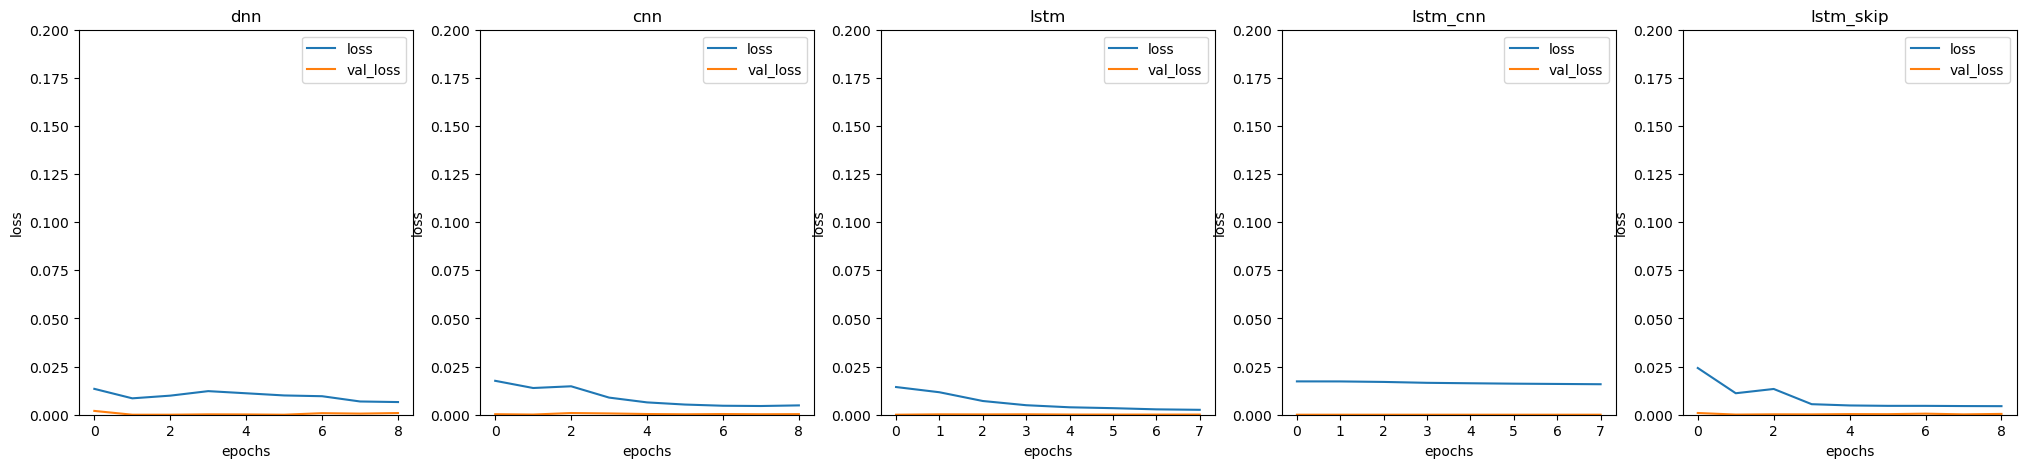

In [25]:
legend = list()

fig, axs = plt.subplots(1, 5, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 0.2)
print("Loss Curves")

MAE Curves


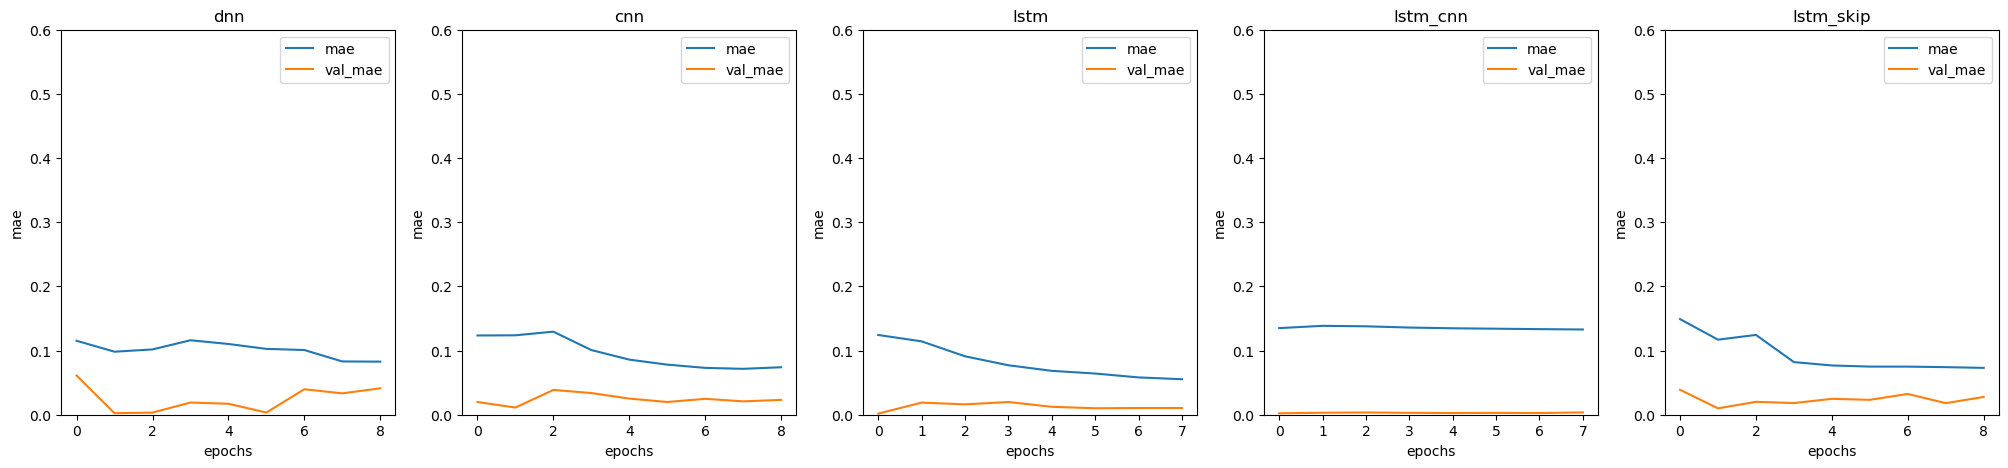

In [26]:
print("MAE Curves")
fig, axs = plt.subplots(1, 5, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 0.6)

In [29]:
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df['error_mw'] = performance_df['mae'] * dataset['temp'].mean()
print(performance_df)  

83/83 [==============================] - 3s 33ms/step - loss: 7.3109e-05 - mae: 0.0100
                mae  error_mw
dnn        0.002358  0.679145
cnn        0.011191  3.223442
lstm       0.001743  0.502049
lstm_cnn   0.002271  0.654272
lstm_skip  0.009965  2.870298


83/83 [==============================] - 3s 33ms/step
First Two Weeks of Predictions


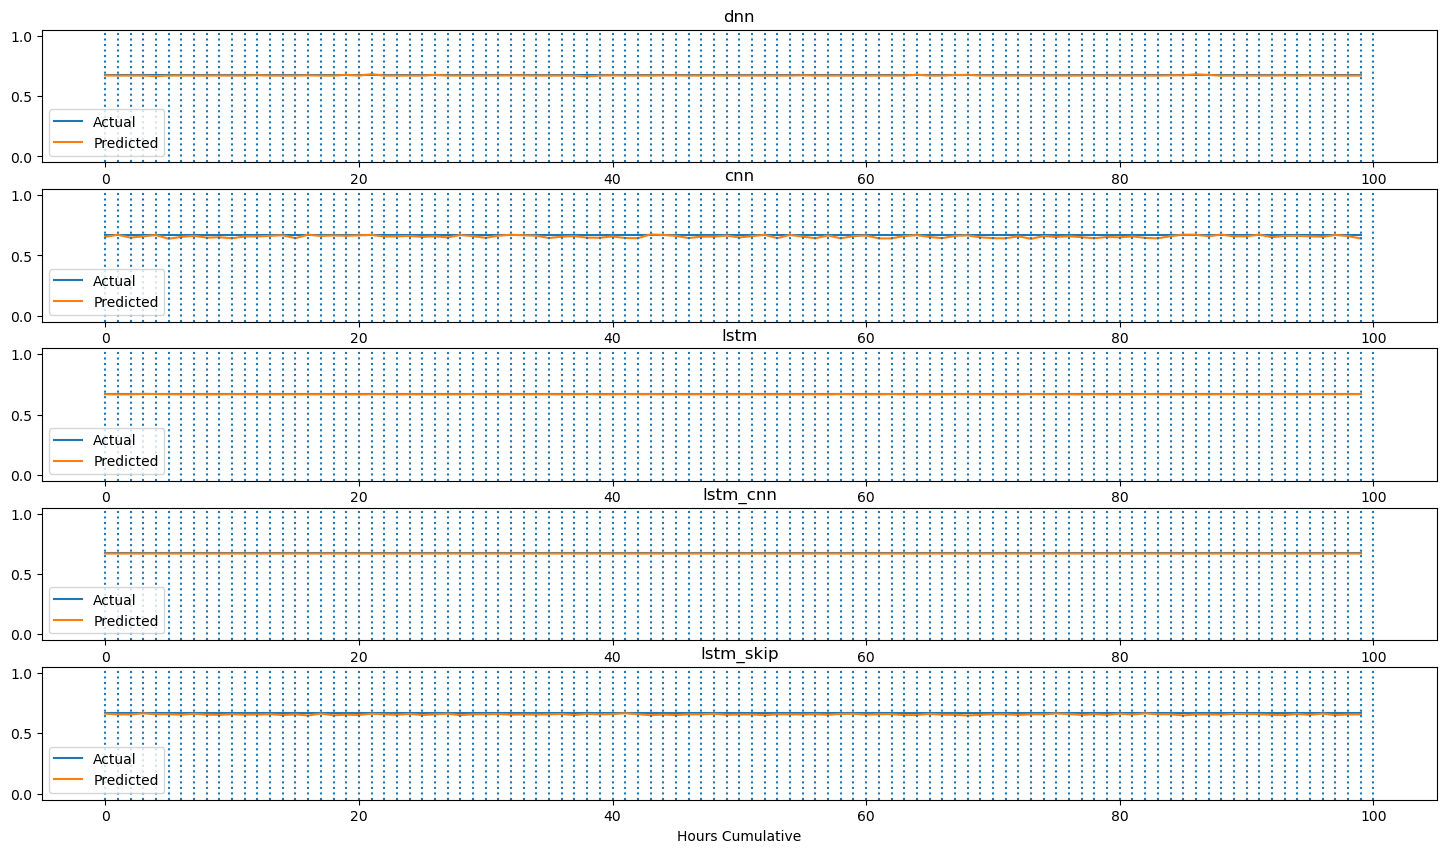

In [32]:
fig, axs = plt.subplots(5, 1, figsize=(18, 10))
days = 100

vline = np.linspace(0, days, days+1)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy()[:days].reshape(-1))
    ax.plot(preds[:days].reshape(-1))
    ax.set_title(key)
    ax.vlines(vline, ymin=0, ymax=1, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual", "Predicted"])

plt.xlabel("Hours Cumulative")
print('First Two Weeks of Predictions')